In [72]:
# PID based cruise control
# @Lucas Elbert Suryana
# Adapted from Matlab code - Meng Wang
# 2 May, 2022
import numpy as np
import matplotlib.pyplot as plt

kp = 2    # Proportional error gain, default 1
ki = 0.1 # Integral error gain, default 0.01
kd = 1  # Derivative error gain, default 0.1

tau = 0.2 # Actuator delay [s]

v0 = 29 # Initial speed [m/s]
T = 30 # Simlation period [s]
dt = 0.1 # Simulation time step [s]
m = T/dt

saturation = 1 # whehter impose saturation in control input
umax = 2 # Maximum acceleration [m/s^2]
umin = -2 # Minimum acceleration [m/s^2]

In [73]:
# Initialisation of variables
ep = np.zeros(int(m)) # Proportional
ed = np.zeros(int(m)) # Derivative
ei = np.zeros(int(m)) # Integral
u = np.zeros(int(m)) # Control input
v = np.zeros(int(m)) 
v[0] = v0 # Initial speed
a = np.zeros(int(m))  # Initial acceleration
a[0] = 0 # Initial acceleration
vref = np.zeros(int(m))
vref[0] = v0 # Reference speed [m/s]
time = np.arange(0,T,dt) # Time

In [74]:
# The main simulation loop
for i in range(0,int(m)): 
    # Reference speed
    if dt*i >= 5:
        vref[i] = 30
    else:
        vref[i] = v0
    
    # Calculate errors
    ep[i] = vref[i] - v[i]
    if i == 0:
        ed[i] = ep[i];
    else: 
        ed[i] = (ep[i] - ep[i-1])/dt
        
    ei[i] = sum(ep)
    
    # Control algorithm
    u[i] = kp* ep[i] + kd*ed[i]+ ki*ei[i]
    
    if saturation == 1:
        u[i] = min(u[i], umax);
        u[i] = max(u[i], umin);
    
    # System dynamics model:
    # da/dt = (u -a)/tau
    if i != int(m-1):
        a[i+1] = dt*(u[i] - a[i])/tau + a[i] 
        v[i+1] = dt*a[i] + v[i]
    else:
        np.append(a, dt*(u[i] - a[i])/tau + a[i])
        np.append(v, dt*a[i] + v[i])

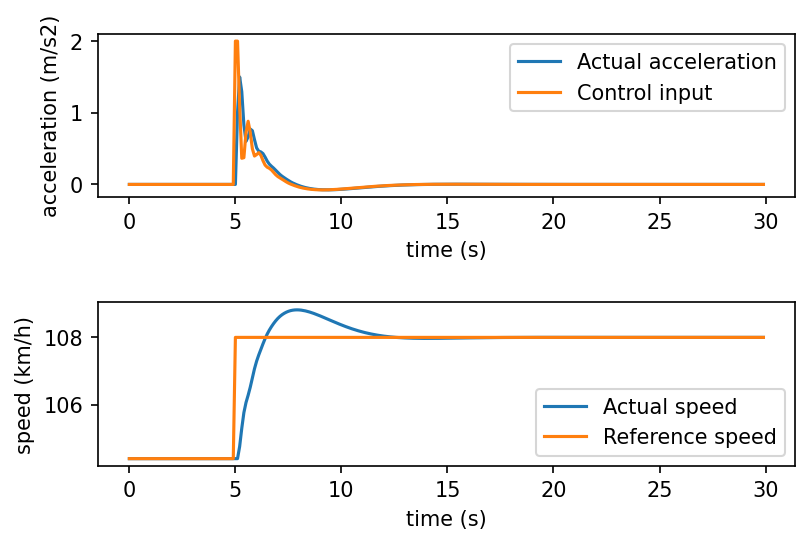

In [75]:
fig, axs = plt.subplots(2, dpi=150)
fig.tight_layout(pad=3.0)

axs[0].plot(time, a, label = 'Actual acceleration')
axs[0].plot(time, u, label = 'Control input')
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('acceleration (m/s2)')
axs[0].legend()

axs[1].plot(time, v*3.6, label = 'Actual speed')
axs[1].plot(time, vref*3.6, label = 'Reference speed')
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('speed (km/h)')
axs[1].legend()